In [35]:
import numpy as np
import gensim
from gensim import corpora, models, similarities
from gensim.models.doc2vec import Doc2Vec, LabeledSentence
from sklearn import metrics
from sklearn.cluster import KMeans
from pprint import pprint
import time
import jieba
import jieba.analyse
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def load_stopword():
    #stopword_path = 'F:\\编程练习\\Jupyter notebook\\文本文件夹\\博客爬虫分析文章\\停用词表.txt'
    stopword_path = 'F:\\学习用夹\\大三下学期\\综合课程设计\\实验数据\\停用词库.txt'
    f_stop = open(stopword_path,'r',encoding='UTF-8')
    sw = [line.strip() for line in f_stop]
    f_stop.close()
    stopword_extend = ['\n','湖北','武汉','病毒','中国','兰州','甘肃','18','我国','北京','10','微博','正文','收起']
    sw.extend(stopword_extend)
    return sw

'''#弃用
def jieba_content(data_path):
    stopwords = load_stopword()
    stopwords.append()
    df = pd.read_excel(data_path)
    segments_list = []
    id_list = []
    for index,row in df.iterrows():
        fileId = row['id']
        fileContent = row['内容']
        segs = jieba.cut(fileContent)
        for seg in segs:
            if seg not in stopwords and len(seg) > 1:
                segments_list.append(seg)
                id_list.append(fileId)
    seg_df = pd.DataFrame({'文本id':id_list,'分词':segments_list})
    return seg_df'''


def jieba_text(data_path):
    stopwords = load_stopword()
    df = pd.read_excel(data_path)
    text_seg_list = []
    for index,row in df.iterrows():
        fileId = row['id']
        fileContent = row['内容']
        segs = jieba.analyse.textrank(fileContent,topK=20,withWeight=False,allowPOS=('ns','n','nr','nt'))  #'ns','n','vn','v','nr','nt'
        segments_list = []
        for seg in segs:
            if seg not in stopwords and len(seg) > 1:
                segments_list.append(seg)
        text_seg_list.append(segments_list)
    return text_seg_list

    
#导出csv文件
def dataToCsv(file,df):
    file_data = df
    file_data.to_csv(file,index=False)
    print('csv文件已生成在：{}'.format(file))

In [13]:
#data_path = 'F:\\学习用夹\\大三下学期\\综合课程设计\\实验数据\\复产内容信息2020-04-29.xls'
#seg_df = jieba_content(data_path)
#print(seg_df)

In [12]:
#test_path = 'F:\\学习用夹\\大三下学期\\综合课程设计\\实验数据\\复产_分词结果_test.csv'
#dataToCsv(test_path,seg_df)

In [11]:
'''segs_count = {}

for seg in seg_df['分词']:
    if seg not in segs_count:
        segs_count[seg] = 1
    else:
        segs_count[seg] += 1
        
sorted(segs_count.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)
'''

"segs_count = {}\n\nfor seg in seg_df['分词']:\n    if seg not in segs_count:\n        segs_count[seg] = 1\n    else:\n        segs_count[seg] += 1\n        \nsorted(segs_count.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)\n"

In [42]:
def LDA(text_seg_list,topic_num):
    # 建立字典
    dictionary = corpora.Dictionary(text_seg_list)
    V = len(dictionary)

    # 转换文本数据为索引，并计数
    corpus = [dictionary.doc2bow(text) for text in text_seg_list]

    # 计算tf-idf值
    corpus_tfidf = models.TfidfModel(corpus)[corpus]

    # 训练模型
    lda = models.LdaModel(corpus_tfidf, num_topics=topic_num, id2word=dictionary)
    #alpha=0.01, eta=0.01, minimum_probability=0.001,update_every=1, chunksize=100, passes=1
    Perplexity = lda.log_perplexity(corpus_tfidf)

    num_show_term = 10  # 每个主题显示几个词
    #print('结果：每个主题的词分布：')
    lda_topic = {'1':[],'2':[],'3':[],'4':[],'5':[],'6':[],'7':[],'8':[],'9':[],'10':[]}
    lda_topic_prob = []
    for topic_id in range(topic_num):
        #print('主题#%d：\t' % topic_id)
        term_distribute_all = lda.get_topic_terms(topicid=topic_id)
        term_distribute = term_distribute_all[:num_show_term]
        term_distribute = np.array(term_distribute)
        term_id = term_distribute[:, 0].astype(np.int)
        #print('词：\t', )
        i = 0
        for t in term_id:
            i += 1
            #print(dictionary.id2token[t], )
            lda_topic[str(i)].append(dictionary.id2token[t])
        #print('\n概率：\t', term_distribute[:, 1])
        lda_topic_prob.append(term_distribute[:, 1])
    return lda_topic,lda_topic_prob,Perplexity

    '''# 随机打印某10个文档的主题
    num_show_topic = 10  # 每个文档显示前几个主题
    print('5.结果：10个文档的主题分布：--')
    doc_topics = lda.get_document_topics(corpus_tfidf)  # 所有文档的主题分布
    idx = np.arange(M)
    np.random.shuffle(idx)
    idx = idx[:10]
    for i in idx:
        topic = np.array(doc_topics[i])
        topic_distribute = np.array(topic[:, 1])
        topic_idx = topic_distribute.argsort()[:-num_show_topic - 1:-1]
        #print('第%d个文档的前%d个主题：' % (i, num_show_topic)), topic_idx
        #print(topic_distribute[topic_idx])'''

In [27]:
data_path_1 = 'F:\\学习用夹\\大三下学期\\综合课程设计\\实验数据\\复产内容信息2020-05-10.xls'
data_path_2 = 'F:\\学习用夹\\大三下学期\\综合课程设计\\实验数据\\复工内容信息2020-05-10.xlsx'
data_path_3 = 'F:\\学习用夹\\大三下学期\\综合课程设计\\实验数据\\消费内容信息2020-05-10.xlsx'

In [43]:
lda_topic_1,lda_topic_prob_1,Perplexity = LDA(jieba_text(data_path_1),6)
df_topic_1 = pd.DataFrame(lda_topic_1)
df_topic_prob_1 = pd.DataFrame(lda_topic_prob_1,columns=['1','2','3','4','5','6','7','8','9','10'])
#[[row[i] for row in lda_topic_prob_1] for i in range(len(lda_topic_prob_1[0]))]
print(df_topic_1)
print(df_topic_prob_1)
#print('困惑度：{}'.format(Perplexity))

    1    2   3   4   5   6     7    8   9  10
0  地铁  武汉市  生态  城市  公交  全文    乘客   司机  视频  形势
1  视频   新闻  新冠  消防  全文  肺炎  检察机关   情况  疫情  全国
2  美国   公司  铁路  动态  小时  用电    电力   交通  孩子  线路
3  核酸   新冠  视频  人员  单位  风险    肺炎   学校  法院  人群
4  复学  感染者  抗体  民警  公安  文章    头条  派出所  整体  家长
5  经济   全文  视频  常态  新闻  企业    疫情   助力  全面  新冠
          1         2         3         4         5         6         7  \
0  0.004454  0.003956  0.003782  0.003586  0.003230  0.003143  0.003060   
1  0.007447  0.006435  0.005845  0.005787  0.005223  0.005115  0.004636   
2  0.010645  0.007612  0.006776  0.006005  0.005980  0.005103  0.005025   
3  0.008655  0.005926  0.005397  0.005376  0.005208  0.004885  0.004873   
4  0.010314  0.006636  0.004538  0.003840  0.003600  0.003269  0.003259   
5  0.006709  0.005438  0.005411  0.004948  0.004840  0.004705  0.004645   

          8         9        10  
0  0.002943  0.002895  0.002867  
1  0.004281  0.004276  0.004231  
2  0.004959  0.003710  0.003710  
3  0.004610  0.0

In [22]:
topic_num = [4,6,10,20,50,100]
for i in topic_num:
    lda_topic_1,lda_topic_prob_1,Perplexity = LDA(jieba_text(data_path_1),i)
    print(Perplexity)

文本数目：26940个
-9.844744431238968
文本数目：26940个
-10.28438771362451
文本数目：26940个
-11.745128149147211
文本数目：26940个
-16.99715142911981
文本数目：26940个
-44.4531121115386
文本数目：26940个
-201.5538024902326


In [44]:
lda_topic_2,lda_topic_prob_2,Perplexity = LDA(jieba_text(data_path_2),6)
df_topic_2 = pd.DataFrame(lda_topic_2)
df_topic_prob_2 = pd.DataFrame(lda_topic_prob_2,columns=['1','2','3','4','5','6','7','8','9','10'])
print(df_topic_2)
print(df_topic_prob_2)

     1    2   3       4   5   6   7    8   9   10
0   核酸   景区  视频      商场  交通  美国  地铁   小时  全文   疫情
1   美国  武汉市  经济      中央  新民  视频  疫情  央视网  核酸  热干面
2   疫情   新冠  全文      企业  新闻  肺炎  公司   电力  助力   视频
3  特朗普   视频  消防      全文  建议  社交  全球   肖战  院士  张文宏
4   常态   英国  线路  世界卫生组织  影院  水平  整治   玻璃  电影   青春
5  刘诗诗   封面  美食      视频  游客  烟火  频道   蜀黍  粉丝   时尚
          1         2         3         4         5         6         7  \
0  0.004925  0.004539  0.003814  0.003803  0.003728  0.003560  0.003529   
1  0.018353  0.005590  0.005320  0.004407  0.004049  0.003946  0.003514   
2  0.008410  0.006674  0.006536  0.006239  0.006108  0.006103  0.005987   
3  0.009093  0.008579  0.005651  0.005473  0.005095  0.004818  0.004725   
4  0.011470  0.009216  0.006244  0.005960  0.005552  0.005517  0.004382   
5  0.008717  0.007186  0.006693  0.005676  0.004927  0.004559  0.004435   

          8         9        10  
0  0.003503  0.003439  0.003307  
1  0.003094  0.003090  0.003030  
2  0.005213  0.005157 

In [45]:
lda_topic_3,lda_topic_prob_3,Perplexity = LDA(jieba_text(data_path_3),6)
df_topic_3 = pd.DataFrame(lda_topic_3)
df_topic_prob_3 = pd.DataFrame(lda_topic_prob_3,columns=['1','2','3','4','5','6','7','8','9','10'])
print(df_topic_3)
print(df_topic_prob_3)

     1    2    3   4    5    6     7     8    9   10
0   肖战   板块  报复性  科技   原油   医药    业绩    资金   指数   贷款
1   新闻  商务部   代码  艺人   助力  国务院  基础设施   发布会   明星   视频
2   数据   公司   经济  科技   市场   疫情    全文    美国   理智  消费者
3   粉丝  工作室   视频  景区  支付宝   全文    补贴    新歌  消费者   华为
4   经济   全文   视频  疫情   链接   网页   消费者    新闻   新冠  大学生
5  消费者   视频   江苏  平台   问题   充值    浙江  人脸识别   收费   权益
          1         2         3         4         5         6         7  \
0  0.009768  0.006068  0.005532  0.004249  0.003898  0.003859  0.003768   
1  0.004843  0.004328  0.004138  0.004001  0.003639  0.003578  0.003542   
2  0.004131  0.003957  0.003737  0.003540  0.003511  0.003360  0.003300   
3  0.007830  0.004799  0.004273  0.004231  0.004152  0.003906  0.003821   
4  0.005615  0.005394  0.005198  0.005065  0.004175  0.004107  0.003573   
5  0.006262  0.006132  0.005890  0.005201  0.004945  0.004743  0.004076   

          8         9        10  
0  0.003600  0.003547  0.003412  
1  0.003485  0.003440  0.003351  
2

In [46]:
df_topic_1

,1,2,3,4,5,6,7,8,9,10
0,地铁,武汉市,生态,城市,公交,全文,乘客,司机,视频,形势
1,视频,新闻,新冠,消防,全文,肺炎,检察机关,情况,疫情,全国
2,美国,公司,铁路,动态,小时,用电,电力,交通,孩子,线路
3,核酸,新冠,视频,人员,单位,风险,肺炎,学校,法院,人群
4,复学,感染者,抗体,民警,公安,文章,头条,派出所,整体,家长
5,经济,全文,视频,常态,新闻,企业,疫情,助力,全面,新冠


In [47]:
df_topic_2

,1,2,3,4,5,6,7,8,9,10
0,核酸,景区,视频,商场,交通,美国,地铁,小时,全文,疫情
1,美国,武汉市,经济,中央,新民,视频,疫情,央视网,核酸,热干面
2,疫情,新冠,全文,企业,新闻,肺炎,公司,电力,助力,视频
3,特朗普,视频,消防,全文,建议,社交,全球,肖战,院士,张文宏
4,常态,英国,线路,世界卫生组织,影院,水平,整治,玻璃,电影,青春
5,刘诗诗,封面,美食,视频,游客,烟火,频道,蜀黍,粉丝,时尚


In [48]:
df_topic_3

,1,2,3,4,5,6,7,8,9,10
0,肖战,板块,报复性,科技,原油,医药,业绩,资金,指数,贷款
1,新闻,商务部,代码,艺人,助力,国务院,基础设施,发布会,明星,视频
2,数据,公司,经济,科技,市场,疫情,全文,美国,理智,消费者
3,粉丝,工作室,视频,景区,支付宝,全文,补贴,新歌,消费者,华为
4,经济,全文,视频,疫情,链接,网页,消费者,新闻,新冠,大学生
5,消费者,视频,江苏,平台,问题,充值,浙江,人脸识别,收费,权益


In [49]:
df_topic_prob_1

,1,2,3,4,5,6,7,8,9,10
0,0.004454,0.003956,0.003782,0.003586,0.003230,0.003143,0.003060,0.002943,0.002895,0.002867
1,0.007447,0.006435,0.005845,0.005787,0.005223,0.005115,0.004636,0.004281,0.004276,0.004231
2,0.010645,0.007612,0.006776,0.006005,0.005980,0.005103,0.005025,0.004959,0.003710,0.003710
3,0.008655,0.005926,0.005397,0.005376,0.005208,0.004885,0.004873,0.004610,0.004400,0.004307
4,0.010314,0.006636,0.004538,0.003840,0.003600,0.003269,0.003259,0.003220,0.003216,0.002969
5,0.006709,0.005438,0.005411,0.004948,0.004840,0.004705,0.004645,0.004278,0.004195,0.003757


In [50]:
df_topic_prob_2

,1,2,3,4,5,6,7,8,9,10
0,0.004925,0.004539,0.003814,0.003803,0.003728,0.003560,0.003529,0.003503,0.003439,0.003307
1,0.018353,0.005590,0.005320,0.004407,0.004049,0.003946,0.003514,0.003094,0.003090,0.003030
2,0.008410,0.006674,0.006536,0.006239,0.006108,0.006103,0.005987,0.005213,0.005157,0.005047
3,0.009093,0.008579,0.005651,0.005473,0.005095,0.004818,0.004725,0.004561,0.004216,0.004137
4,0.011470,0.009216,0.006244,0.005960,0.005552,0.005517,0.004382,0.004046,0.003832,0.003632
5,0.008717,0.007186,0.006693,0.005676,0.004927,0.004559,0.004435,0.004420,0.003916,0.003818


In [51]:
df_topic_prob_3

,1,2,3,4,5,6,7,8,9,10
0,0.009768,0.006068,0.005532,0.004249,0.003898,0.003859,0.003768,0.003600,0.003547,0.003412
1,0.004843,0.004328,0.004138,0.004001,0.003639,0.003578,0.003542,0.003485,0.003440,0.003351
2,0.004131,0.003957,0.003737,0.003540,0.003511,0.003360,0.003300,0.003295,0.003243,0.003237
3,0.007830,0.004799,0.004273,0.004231,0.004152,0.003906,0.003821,0.003610,0.003547,0.003420
4,0.005615,0.005394,0.005198,0.005065,0.004175,0.004107,0.003573,0.003497,0.003216,0.003014
5,0.006262,0.006132,0.005890,0.005201,0.004945,0.004743,0.004076,0.003522,0.003472,0.003283


In [37]:
#doc2vec与K-means聚类
TaggededDocument = gensim.models.doc2vec.TaggedDocument
 
    
def get_train(text_seg_list):
    x_train = []
    for i, text in enumerate(text_seg_list):
        document = TaggededDocument(text, tags=[i])
        x_train.append(document)
    return x_train
 
    
def train(x_train, size=200, epoch_num=1):
    model_dm = Doc2Vec(x_train,min_count=1, window = 3, size = size, sample=1e-3, negative=5, workers=4)
    model_dm.train(x_train, total_examples=model_dm.corpus_count, epochs=100)
    #model_dm.save('model/model_dm')
    return model_dm
 
    
def cluster(x_train,model_dm,n_clu):
    infered_vectors_list = []
    for text, label in x_train:
        vector = model_dm.infer_vector(text)
        infered_vectors_list.append(vector)
 
    kmean_model = KMeans(n_clusters=n_clu)
    kmean_model.fit(infered_vectors_list)
    labels= kmean_model.predict(infered_vectors_list)
    #cluster_centers = kmean_model.cluster_centers_
    #for i in range(len(x_train)):
    #print(labels)
    return labels,infered_vectors_list

#降维可视化
def dimension_visual(X,y):
    df = pd.concat([X,y],axis=1)
    tsne = TSNE()
    tsne.fit_transform(df) #进行数据降维
    tsne = pd.DataFrame(tsne.embedding_, index = df.index) #转换数据格式
    plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
    #不同类别用不同颜色和样式绘图
    d = tsne[df.iloc[:,-1] == 0]
    plt.plot(d[0], d[1], 'r.')
    d = tsne[df.iloc[:,-1] == 1]
    plt.plot(d[0], d[1], 'go')
    d = tsne[df.iloc[:,-1] == 2]
    plt.plot(d[0], d[1], 'b*')
    d = tsne[df.iloc[:,-1] == 3]
    plt.plot(d[0], d[1], '#A52A2A')
    d = tsne[df.iloc[:,-1] == 4]
    plt.plot(d[0], d[1], '#000000')
    plt.show()
    
def dimension_visual_df(df):
    tsne = TSNE()
    tsne.fit_transform(df) #进行数据降维
    tsne = pd.DataFrame(tsne.embedding_, index = df.index) #转换数据格式
    plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
    #不同类别用不同颜色和样式绘图
    d = tsne[df.iloc[:,-1] == 0]
    plt.plot(d[0], d[1], 'r.')
    d = tsne[df.iloc[:,-1] == 1]
    plt.plot(d[0], d[1], 'go')
    d = tsne[df.iloc[:,-1] == 2]
    plt.plot(d[0], d[1], 'b*')
    d = tsne[df.iloc[:,-1] == 3]
    plt.plot(d[0], d[1], '#A52A2A')
    d = tsne[df.iloc[:,-1] == 4]
    plt.plot(d[0], d[1], '#000000')
    plt.show()

In [33]:
text_seg_list = jieba_text(data_path_3)
x_train = get_train(text_seg_list)
model_dm = train(x_train)
labels,infered_vectors_list = cluster(x_train,model_dm,5)
clu_df = pd.DataFrame({'texts':text_seg_list})
clu_df['labels'] = labels
#print(clu_df[0:10])
#dimension_visual(infered_vectors_list,labels)

C:\Users\Mu_Xiaobai\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


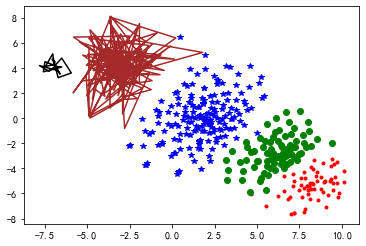

In [52]:
df = pd.concat([pd.DataFrame(infered_vectors_list),pd.DataFrame(labels)],axis=1)
dimension_visual_df(df.sample(n=500))

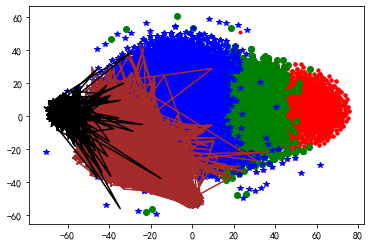

In [41]:
dimension_visual(pd.DataFrame(infered_vectors_list),pd.DataFrame(labels))

In [14]:
#轮廓系数评估
infered_vectors_list = []
for text, label in x_train:
    vector = model_dm.infer_vector(text)
    infered_vectors_list.append(vector)

def get_cluster_n(infered_vectors_list,model_dm,n_clu):
    kmean_model = KMeans(n_clusters=n_clu)
    kmean_model.fit(infered_vectors_list)
    labels = kmean_model.predict(infered_vectors_list)
    print(metrics.silhouette_score(infered_vectors_list, kmean_model.labels_, metric='euclidean'))

n_clu = [2,5,15,30,60,90] 
for i in n_clu:
    get_cluster_n(infered_vectors_list,model_dm,i)

0.032615103
-0.023886936
-0.061785717
-0.07417192
-0.1247808
-0.14033984


In [32]:
a = [['a',1,2],['b',3,4],['c',4,5]]
A = pd.DataFrame([[row[i] for row in a] for i in range(len(a[0]))])
A.iloc[:,-1]

0    c
1    4
2    5
Name: 2, dtype: object